# Заревич Михаил 513-2
Вариант 169

## Подготовка данных

In [ ]:
import pandas as pd
import scipy
import numpy as np
import sympy
import math


import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# по умолчанию первая строчка csv файла записывается в заголовок колонки
# чтобы этого не было надо написать header = None
df = pd.read_csv("/content/v169.csv", header = None)

df = df.rename(columns={0: "X"})
df = df.rename(columns={1: "Y"})

df

,X,Y
0,10,21
1,24,43
2,12,33
3,12,-4
4,51,101
...,...,...
4995,34,133
4996,3,-27
4997,20,29
4998,36,74


Корреляционная таблица

In [ ]:
# FrequencyTable
ft = pd.crosstab(df["X"], df["Y"])
ft

Y,-50,-49,-46,-45,-44,-43,-42,-41,-40,-39,...,209,210,211,212,213,214,215,216,217,219
X,,,,,,,,,,,,,,,,,,,,,
1,1,1,2,1,2,1,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Посчитаем выборочные характеристики связи двух случайных величин.

Выборочная ковариация:
$$ COV(\hat{X}, \hat{Y}) = \frac{1}{n} \sum_{i=1}^k\sum_{j=1}^l\hat{x_i}\hat{y_j}\nu_{ij}- \overline{x}\overline{y}$$

Выборочный коффициент корреляции:
$$ r_{xy} = \frac{COV(X,Y)}{\sigma_x\sigma_y} $$

Коэффициент детерминации
$$ R_{xy} = r_{xy}^2 $$

In [ ]:
COV = 0
n = 0 # сумма абсолютных частот, она должна быть равна len(df) 5000
# цикл по строкам
for xi in range(len(ft.index)):
    # цикл по столбцам
    for yj in range(len(ft.columns)):

        #ft.index[xi] - Значение СВ X
        #ft.columns[yj] - Значение СВ Y
        # ft.loc[ft.index[xi]][ft.columns[yj]] - Абсолютная частота

        COV += ft.index[xi]*ft.columns[yj]*ft.loc[ft.index[xi]][ft.columns[yj]]
        n+=ft.loc[ft.index[xi]][ft.columns[yj]] # проверка, нужно, чтобы сумма была равна len(df) 5000

COV /= len(df)
COV -= df["X"].mean()*df["Y"].mean()

print(n)

print("Выборочная ковариация: ", COV)
rxy = COV/(df["X"].std()*df["Y"].std())
Rxy = rxy**2
print("Выборочный коэффициент корреляции: ", rxy)
print("Выборочный коэффициент детерминации: ", Rxy)


5000
Выборочная ковариация:  741.1346817599997
Выборочный коэффициент корреляции:  0.8242565668573733
Выборочный коэффициент детерминации:  0.6793988880075035


В библиотеке pandas есть встроенная функция для поиска коэффицента корреляции, посмотрим, что посчитает она.

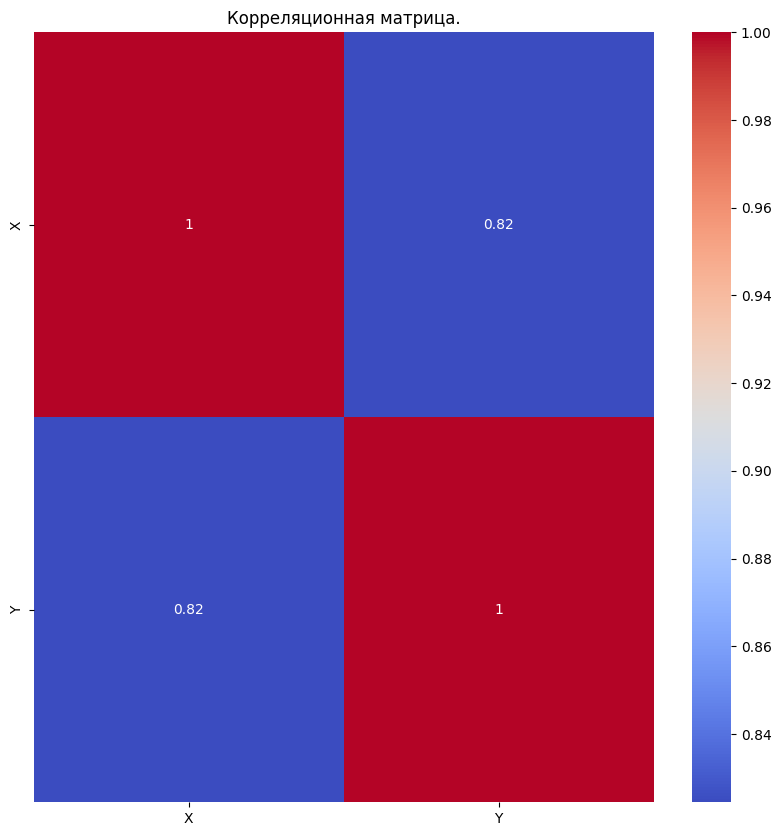

In [ ]:
CorrMatrix = df.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(CorrMatrix, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица.")
plt.show()

In [ ]:
CorrMatrix

,X,Y
X,1.000000,0.824421
Y,0.824421,1.000000


**Вывод**

Мой коэффициент корреляции немного отличается от посчитанного с помощью встроенной функции, но они оба довольно близки к единице. Использование линейной регрессии в этом случае имеет смысл.

## Прямая регрессии Y на Х

Выборочное уравнение прямой регрессии Y на X
$$ g(x) = r_{xy}\frac{\sigma_y}{\sigma_x}(x - \overline{x})+ \overline{y} $$

Найдём коэффициенты прямой с помощью встроенной функции linregress

In [ ]:
# slope - наклон прямой - k
# intercept - пересечение с осью x - b
LinRegCoefs = scipy.stats.linregress(df["X"], df["Y"])
LinRegCoefs

LinregressResult(slope=np.float64(2.959459563324443), intercept=np.float64(1.6555916887847246), rvalue=np.float64(0.824421451147609), pvalue=np.float64(0.0), stderr=np.float64(0.028738448196429445), intercept_stderr=np.float64(0.9237211425788735))

Получим уравнение в аналитическом виде при помощи sympy

In [ ]:
x = sympy.Symbol("x")
k = sympy.Symbol("k")
b = sympy.Symbol("b")

expr = (k*x+b).subs([(k, LinRegCoefs[0]), (b, LinRegCoefs[1])])
print("g(x) =", expr)

g(x) = 2.95945956332444*x + 1.65559168878472


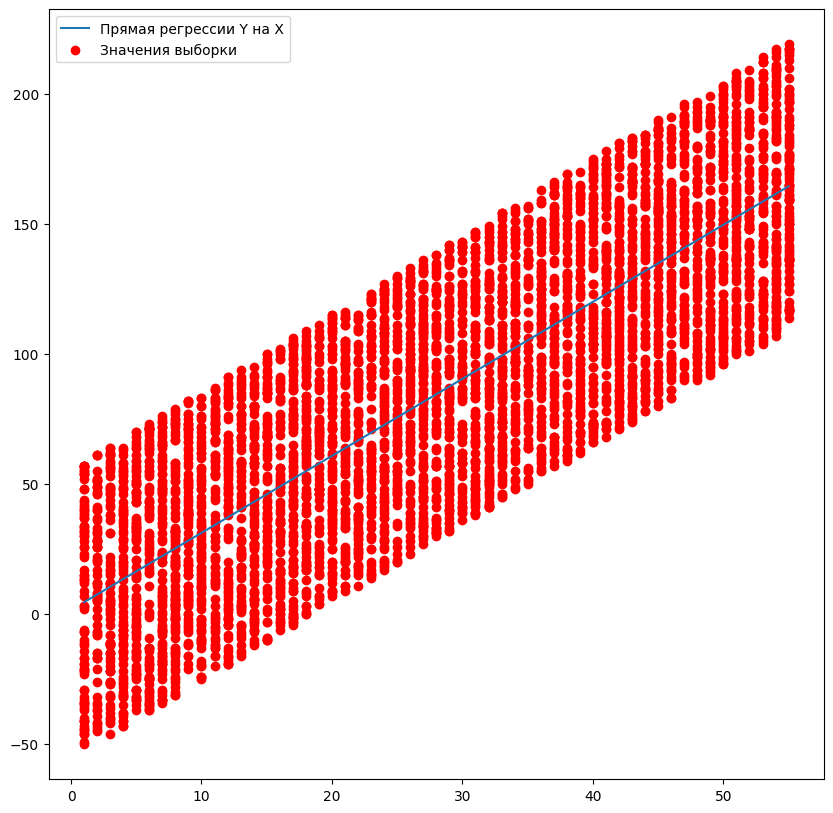

In [ ]:
plt.figure(figsize=(10, 10))

x = np.linspace(1 , 55)

y = 2.95945956332444*x + 1.65559168878472

plt.plot(x, y, label = "Прямая регрессии Y на X")
plt.scatter(df["X"], df["Y"], color='red', label = "Значения выборки")

plt.legend();

plt.show()

Построим прямую со значениями, найденными мной.

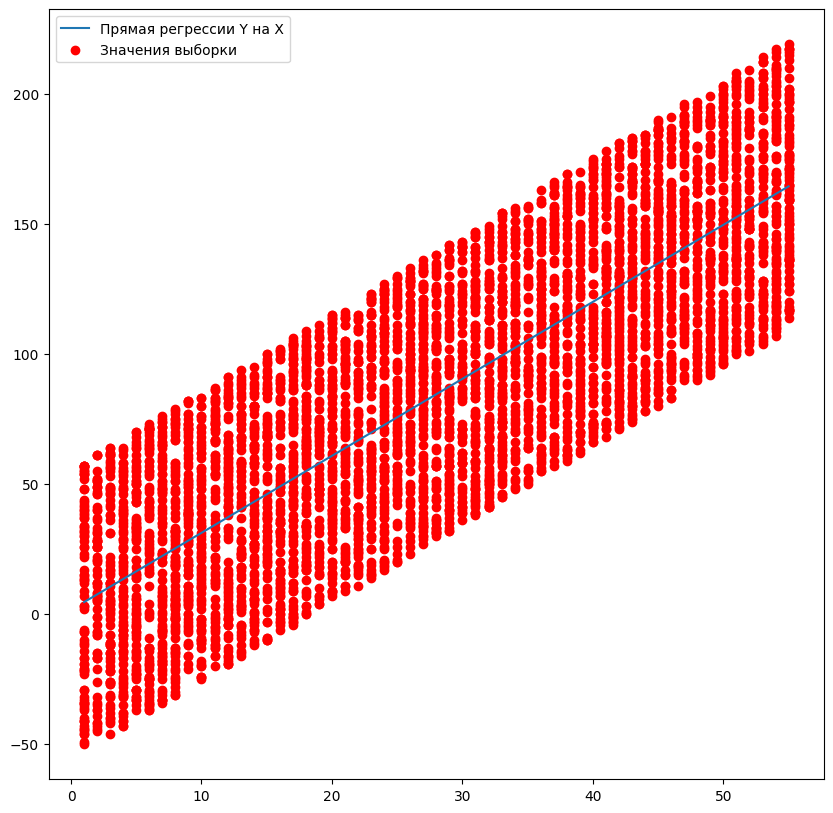

In [ ]:
plt.figure(figsize=(10, 10))

x = np.linspace(1 , 55)

y = rxy*df["Y"].std()/df["X"].std()*(x - df["X"].mean())+ df["Y"].mean()

plt.plot(x, y, label = "Прямая регрессии Y на X")
plt.scatter(df["X"], df["Y"], color='red', label = "Значения выборки")

plt.legend();

plt.show()

Остаточная дисперсия Y на X

$$ Δ = \sigma_{y}^2(1-r_{xy}^2) $$

In [ ]:
delta1 = math.sqrt(df["Y"].std())*(1- math.sqrt(rxy))
print("Остаточная дисперсия Y на X", delta1)

Остаточная дисперсия Y на X 0.6943064499504368


**Вывод.**

Моя прямая совпадает с прямой, построенной при помощи scipy.

## Прямая регрессии X на Y

Выборочное уравнение прямой регрессии X на Y
$$ g(y) = r_xy\frac{\sigma_x}{\sigma_y}(y - \overline{y})+ \overline{x} $$

In [ ]:
# slope - наклон прямой - k
# intercept - пересечение с осью x - b
LinRegCoefs = scipy.stats.linregress(df["Y"], df["X"])

LinRegCoefs

LinregressResult(slope=np.float64(0.22966042095497885), intercept=np.float64(8.581564061594317), rvalue=np.float64(0.824421451147609), pvalue=np.float64(0.0), stderr=np.float64(0.0022301653288922733), intercept_stderr=np.float64(0.22698652736373795))

In [ ]:
y = sympy.Symbol("y")
k = sympy.Symbol("k")
b = sympy.Symbol("b")

expr = (k*y+b).subs([(k, LinRegCoefs[0]), (b, LinRegCoefs[1])])
print("g(y) =", expr)

g(y) = 0.229660420954979*y + 8.58156406159432


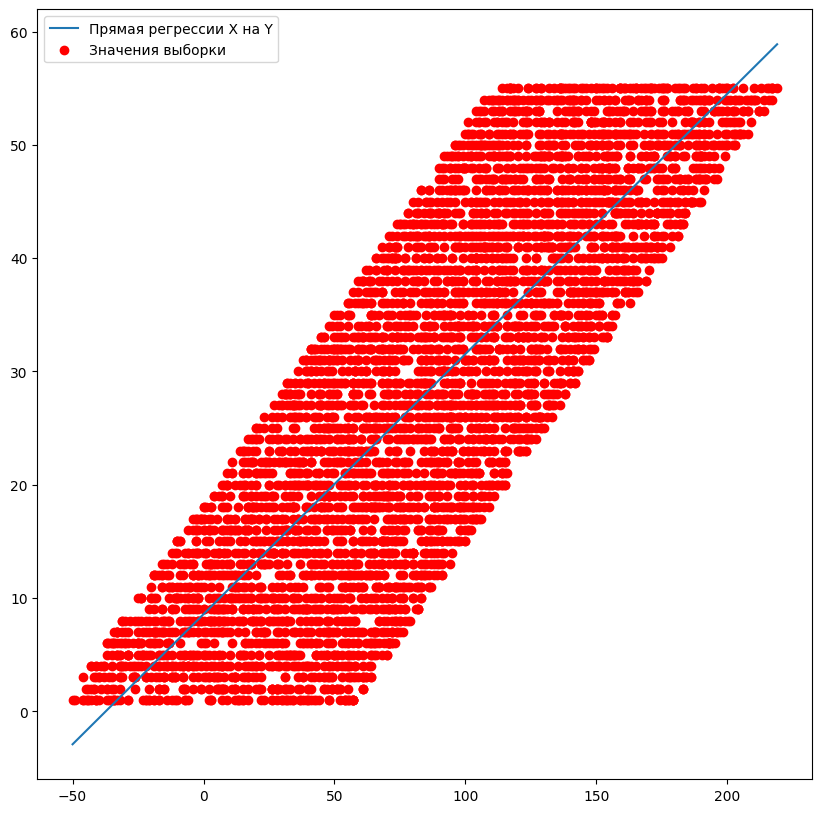

In [ ]:
plt.figure(figsize=(10, 10))

y = np.linspace(-50, 219)

x = 0.22966042095497*y + 8.58156406159432

plt.plot(y, x, label="Прямая регрессии X на Y")
plt.scatter(df["Y"], df["X"], color='red', label = "Значения выборки")

plt.legend();

plt.show()

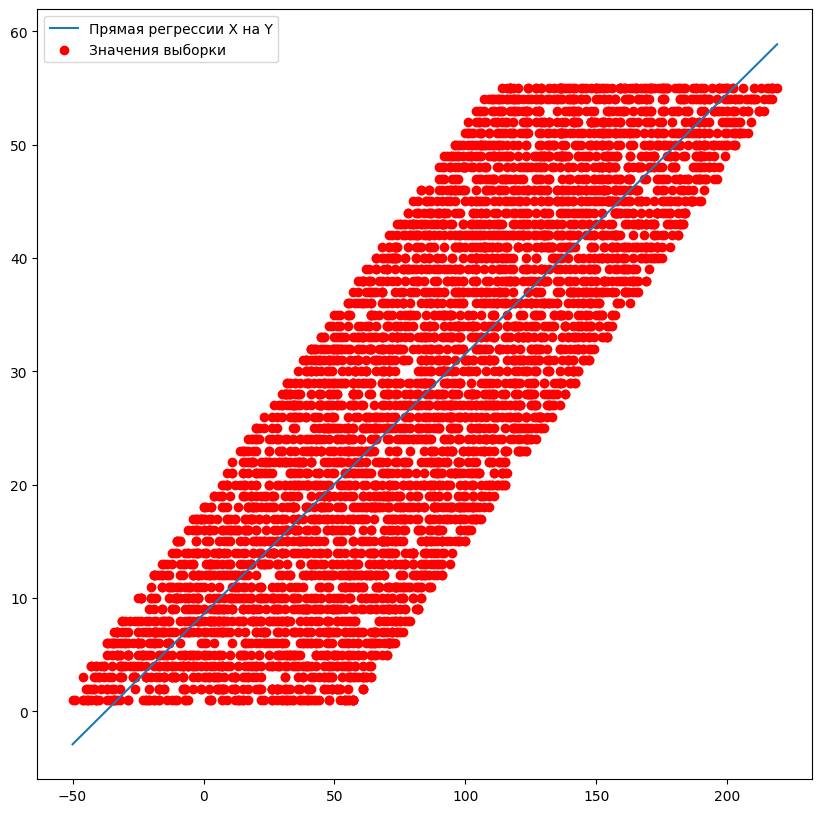

In [ ]:
plt.figure(figsize=(10, 10))


y = np.linspace(-50, 219)

x = rxy*df["X"].std()/df["Y"].std()*(y - df["Y"].mean())+ df["X"].mean()

plt.plot(y, x, label="Прямая регрессии X на Y")
plt.scatter(df["Y"], df["X"], color='red', label = "Значения выборки")

plt.legend();

plt.show()

Остаточная дисперсия X на Y

$$ Δ = \sigma_{x}^2(1-r_{xy}^2) $$

In [ ]:
delta1 = math.sqrt(df["X"].std())*(1- math.sqrt(rxy))
print("Остаточная дисперсия X на Y", delta1)

Остаточная дисперсия X на Y 0.36645414323768216


**Вывод.**

Моя прямая совпадает с прямой, построенной при помощи scipy.

## Сравнение прямых регрессии

Построим обе прямые на одном графике.

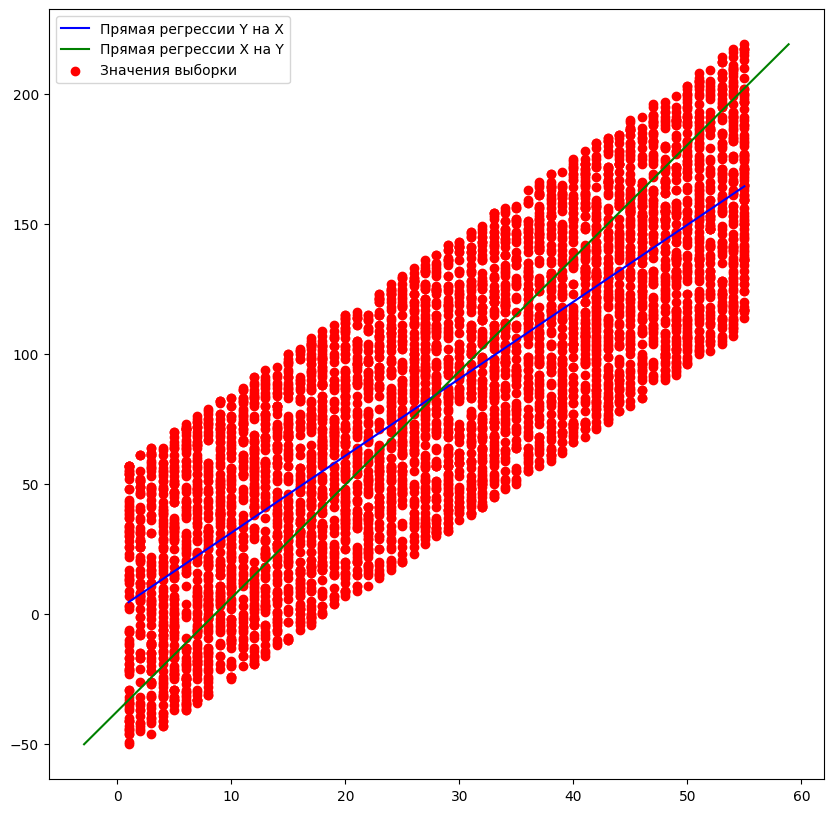

In [ ]:
plt.figure(figsize=(10, 10))

# Линейная регрессия Y на X
x = np.linspace(1 , 55)
y = 2.95945956332444*x + 1.65559168878472

plt.plot(x, y, label = "Прямая регрессии Y на X", color = "blue")


# Линейная регрессия X на Y
y = np.linspace(-50, 219)
x = 0.22966042095497*y + 8.58156406159432
plt.plot(x, y, label="Прямая регрессии X на Y", color="green")

plt.scatter(df["X"], df["Y"], color='red', label = "Значения выборки")

plt.legend();
plt.show()

## Линейная регрессиия Y на X при помощи библиотеки sklearn

Посчитаем линейную регрессию с помощью библиотеки sklearn.

In [ ]:
# Функция, разбивающая выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

# Метрики
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score


In [ ]:
def model_train_test(model, X_train, y_train, X_test, y_test):
  """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.

  Параметры:
   model - Модель, которая обучается и тестируется
   X_train - Объекты обучающей выборки
   y_train - Значения целевой переменной обучающей выборки
   X_test - Объекты тестовой выборки
   y_test - Значения целевой переменной тестовой выборки

   Возвращает:
   model - Обученная модель
   pred - Предсказанные значения
   mae - Метрика MAE
   mape - Метрика MAPE
   mse - Метрика MSE
   rmse - Метрика RMSE
  """

  model.fit(X_train, y_train) # Обучение модели на тренировочной выборке
  pred = model.predict(X_test) # Предсказания модели на тестовой выборке

  # метрики ошибок
  mae = mean_absolute_error(y_test, pred)
  mape = mean_absolute_percentage_error(y_test, pred)
  mse = mean_squared_error(y_test, pred)
  rmse = math.sqrt(mse)
  r2 = r2_score(y_test, pred) # коэффициент детерминации

  print(f"MAE = {mae}; MAPE = {mape}; MSE = {mse}; RMSE = {rmse}; r2 = {r2}")

  return model, pred, mae, mape, mse, rmse, r2

По значениям признаков будем предсказывать значения целевой переменной.

In [76]:
x1 = pd.DataFrame(df["X"]) # Признаки
y1 = pd.DataFrame(df["Y"]) # Значения целевой переменной

X_train, X_test, y_train, y_test = train_test_split(
    x1, y1,
    test_size=0.2, random_state=42
)

In [77]:
LinearModelYX, PredLrYX, MaeLr, MapeLr, MseLr, RmseLr, r2Lr = model_train_test(
    LinearRegression(), # Linear regression по умолчанию использует МНК
    X_train,
    y_train,
    X_test,
    y_test,
)

MAE = 27.78450699525713; MAPE = 71577192957147.78; MSE = 1040.8039071202552; RMSE = 32.26149263627235; r2 = 0.661071532551321


Метрика Mape получилась очень странной.

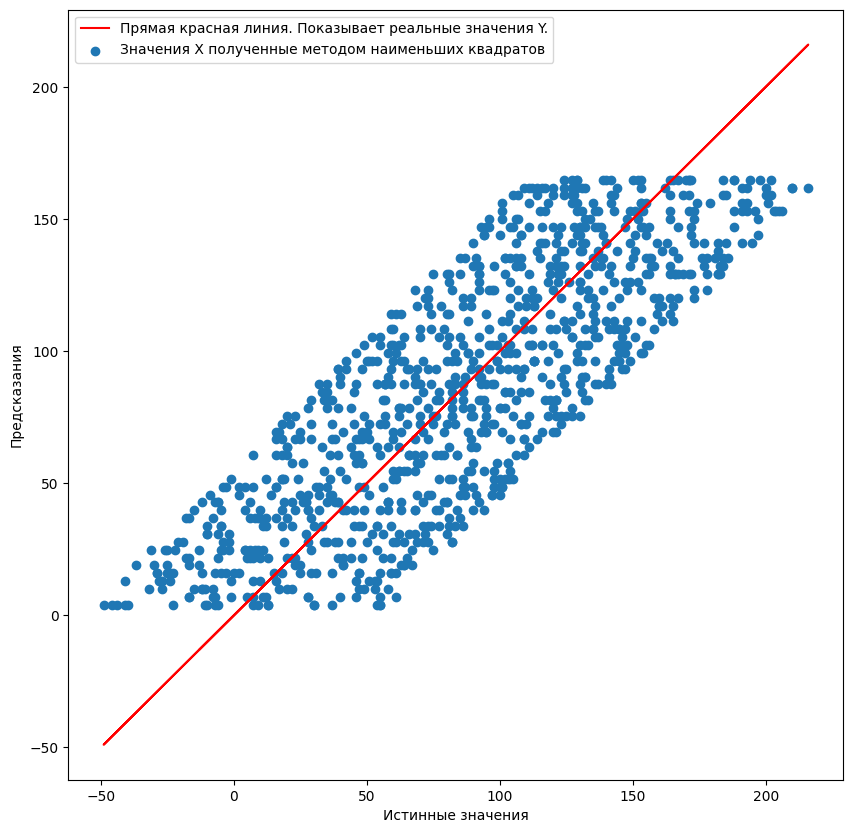

In [80]:
plt.figure(figsize=(10, 10))


# Прямая красная линия. Показывает реальные значения.
plt.plot(y_test, y_test, label="Прямая красная линия. Показывает реальные значения Y.", color="red")

# Голубые точки. Показывает, какое значение предсказала модель.
plt.scatter(y_test, PredLrYX, label="Значения X полученные методом наименьших квадратов")


plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Предсказания");

## Линейная регрессия X на Y при помощи библиотеки sklearn

Чтобы её получить, поменял x и y местами.

In [81]:
y1 = pd.DataFrame(df["X"]) # Целевая переменная
x1 = pd.DataFrame(df["Y"]) # Признаки

X_train, X_test, y_train, y_test = train_test_split(
    x1, y1,
    test_size=0.2, random_state=42
)

In [82]:
LinearModelXY, PredLrXY, MaeLr, MapeLr, MseLr, RmseLr, r2Lr = model_train_test(
    LinearRegression(), # Linear regression по умолчанию использует МНК
    X_train,
    y_train,
    X_test,
    y_test,
)

MAE = 7.532238149734005; MAPE = 0.6679761934519683; MSE = 83.18504602693721; RMSE = 9.120583645081997; r2 = 0.6620040381731327


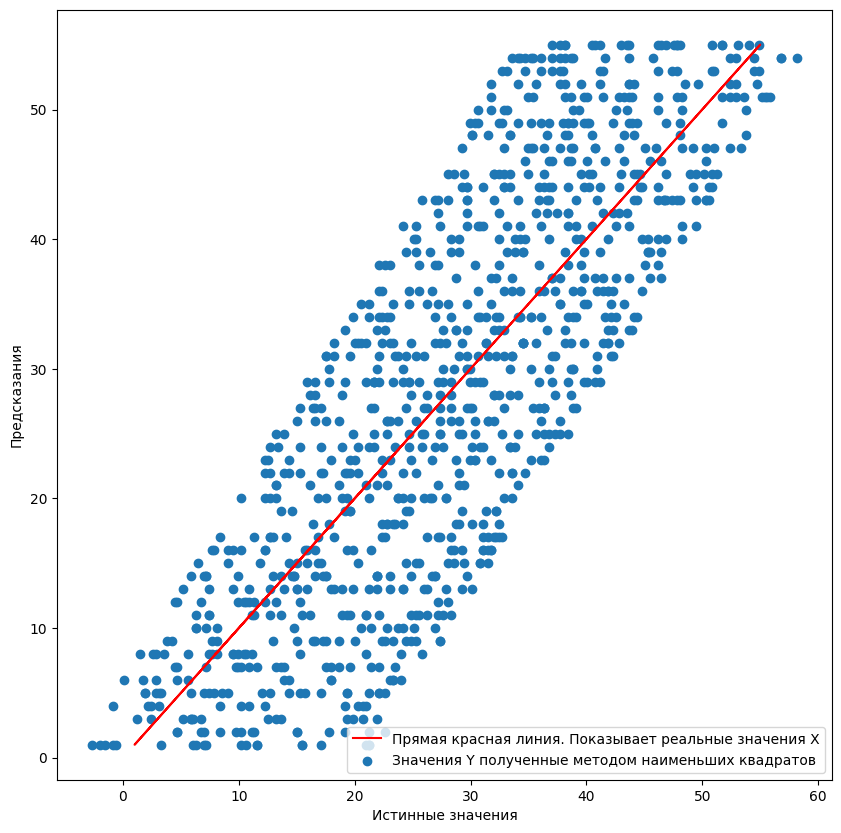

In [83]:
plt.figure(figsize=(10, 10))


# Прямая красная линия. Показывает реальные значения.
plt.plot(y_test, y_test, label="Прямая красная линия. Показывает реальные значения X", color="red")


# Голубые точки. Показывает, какое значение предсказала модель.
#plt.scatter(y_test, PredLrXY, label="Значения Y полученные методом наименьших квадратов")
plt.scatter(PredLrXY, y_test, label="Значения Y полученные методом наименьших квадратов")


plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Предсказания");

Построим данные выборки и предсказанные значения на одном графике.

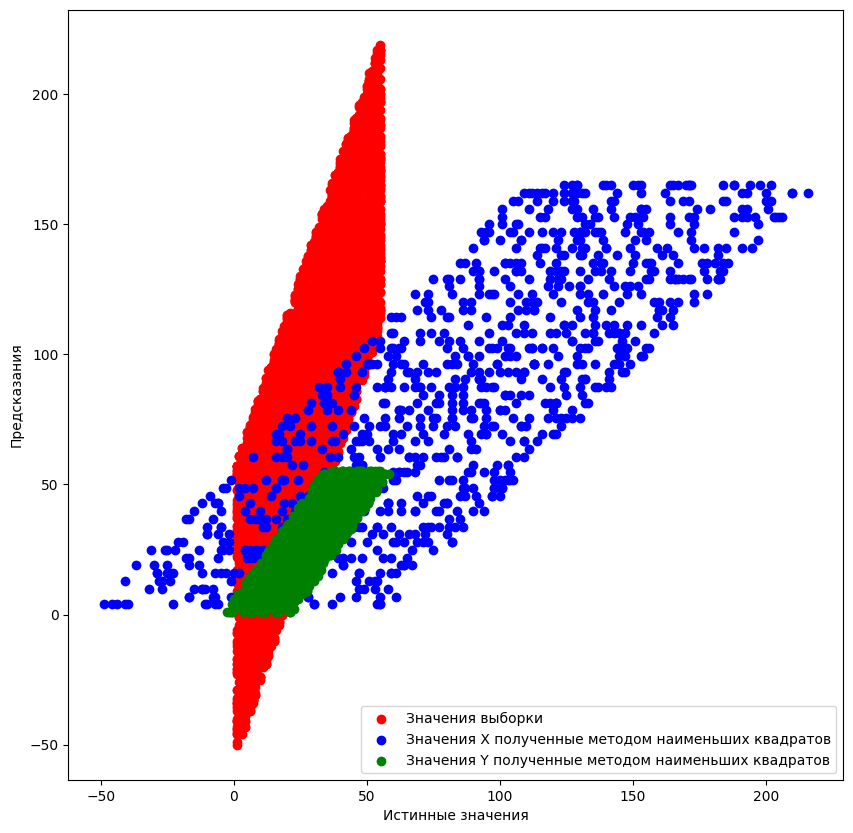

In [84]:
plt.figure(figsize=(10, 10))


# Прямая красная линия. Показывает реальные значения.
plt.scatter(df["X"], df["Y"], label="Значения выборки", color="red")


# Голубые точки. Показывает, какое значение предсказала модель.
plt.scatter(X_test, PredLrYX, color = "blue", label="Значения X полученные методом наименьших квадратов")
plt.scatter(PredLrXY, y_test, color = "green", label="Значения Y полученные методом наименьших квадратов")


plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Предсказания");

## Вывод

Некоторые значения, посчитанные мной, например коэффициент корреляции и коэффициент детерминации, немного отличаются от тех, которые были посчитаны библиотеками. Не знаю, почему это произошло, надо, видимо, лучше изучать, как эти библиотеки работают внутри.

Прямые регрессии Y на X и X на Y, если нанести их на один график,  выглядят похожими. Как интерпретировать значения, полученные через sklearn, я не знаю.

В целом, если ситуация такая, что предсказывать значение Y надо только по одной случайной величине, то применение регрессии вполне имеет смысл. Однако я бы посоветовал найти ещё какие-нибудь случайные величины, коррелирующие с Y, и построить множественную линейную регрессию. Она, по моему опыту, работает лучше.
